<a href="https://colab.research.google.com/github/YashD2109/internship_Cothon_solutions/blob/main/Task2_cothon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Dataset and Requirements Description**
   - The **goal** is to segment customers based on purchasing behavior or demographics using clustering techniques like K-Means or DBSCAN, analyze the clusters, and visualize results.
   - The **dataset** must be public or relevant to customer data (e.g., retail or ecommerce data).

---

### **Technologies Required**
   - **Data Analysis**: Use of Pandas for data cleaning, exploration, and feature preparation.
   - **Clustering Algorithms**: Implementation of K-Means using Scikit-learn; DBSCAN can be added as an alternative.
   - **Dimensionality Reduction**: PCA is implemented to reduce the feature space to 2 dimensions.
   - **Visualization**: Results are visualized using Matplotlib and Seaborn.

---


<ipython-input-1-3c4700f8b842>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df['Work_Experience'].fillna(dataset_df['Work_Experience'].median(), inplace=True)
<ipython-input-1-3c4700f8b842>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Explained Variance by PCA Components: [0.5108713  0.16753269]


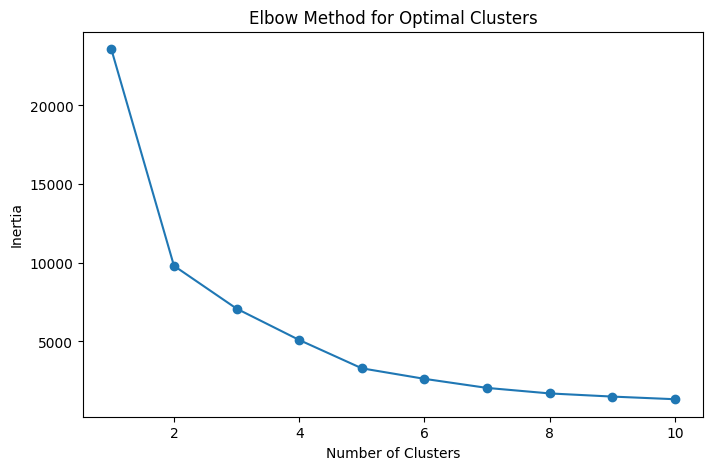

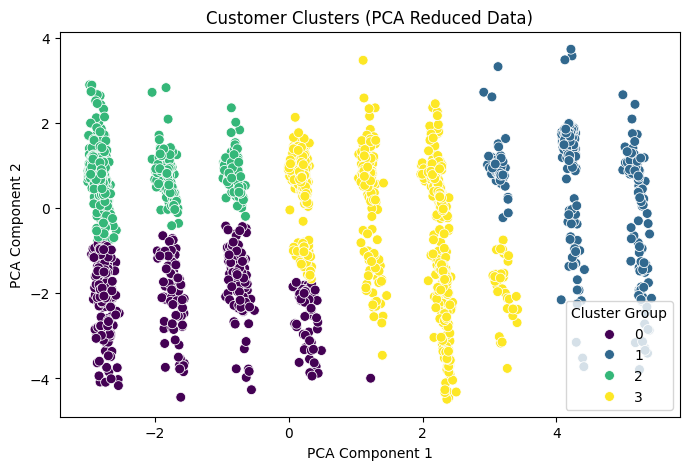

Silhouette Score for Clustering: 0.47692229157432314
                          ID    Gender  Ever_Married        Age  Graduated  \
Cluster_Group                                                                
0              463632.146288  0.449782      0.650655  40.200873   0.626638   
1              463206.853403  0.437173      0.746073  60.115183   0.539267   
2              463286.551198  0.483660      0.671024  45.133987   0.811547   
3              463584.936709  0.698504      0.484465  36.661680   0.474108   

               Profession  Work_Experience  Spending_Score  Family_Size  \
Cluster_Group                                                             
0                1.113537         2.388646        1.207424     3.109170   
1                7.159686         2.138743        1.523560     2.327225   
2                0.412854         2.506536        1.241830     2.403050   
3                4.273878         2.388953        1.545455     3.233602   

                  Var_1  Cl

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

dataset_df = pd.read_csv('/content/Test.csv')

# Handle missing values
dataset_df['Work_Experience'].fillna(dataset_df['Work_Experience'].median(), inplace=True)
dataset_df['Family_Size'].fillna(dataset_df['Family_Size'].median(), inplace=True)
dataset_df['Profession'].fillna(dataset_df['Profession'].mode()[0], inplace=True)

# Encode categorical variables
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
encoder_dict = {}
for feature in categorical_features:
    encoder_instance = LabelEncoder()
    dataset_df[feature] = encoder_instance.fit_transform(dataset_df[feature])
    encoder_dict[feature] = encoder_instance

#Feature Scaling
numeric_features = ['Age', 'Work_Experience', 'Family_Size']
scaler_instance = StandardScaler()
scaled_numeric = scaler_instance.fit_transform(dataset_df[numeric_features])


final_features = np.hstack((scaled_numeric, dataset_df[categorical_features].values))


pca_reducer = PCA(n_components=2, random_state=42)
reduced_features = pca_reducer.fit_transform(final_features)


explained_variance_ratios = pca_reducer.explained_variance_ratio_
print(f"Explained Variance by PCA Components: {explained_variance_ratios}")


kmeans_inertia = []
cluster_options = range(1, 11)
for cluster_count in cluster_options:
    kmeans_instance = KMeans(n_clusters=cluster_count, random_state=42, n_init=10)
    kmeans_instance.fit(reduced_features)
    kmeans_inertia.append(kmeans_instance.inertia_)

# Elbow Method Visualization
plt.figure(figsize=(8, 5))
plt.plot(cluster_options, kmeans_inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


optimal_clusters = 4
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_assignments = final_kmeans.fit_predict(reduced_features)

#Add Cluster Labels to Data
dataset_df['Cluster_Group'] = cluster_assignments

# Visualize Clusters with Plotly Express
import plotly.express as px

fig = px.scatter(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    color=dataset_df['Cluster_Group'].astype(str),
    title="Customer Clusters (PCA Reduced Data)",
    labels={"x": "PCA Component 1", "y": "PCA Component 2"},
)
fig.show()

#Clusters with Seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=cluster_assignments,
    palette='viridis',
    s=50
)
plt.title('Customer Clusters (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Group')
plt.show()

# Evaluate Clustering
silhouette_avg_score = silhouette_score(reduced_features, cluster_assignments)
print(f"Silhouette Score for Clustering: {silhouette_avg_score}")

# Analyze Clusters
numeric_columns = dataset_df.select_dtypes(include=np.number).columns
cluster_analysis = dataset_df.groupby('Cluster_Group')[numeric_columns].mean()
print(cluster_analysis)



#### **Visualization**
   - Scatterplot of clusters based on PCA components is generated using Seaborn for easy visualization of customer groups.
   - Visualizations are clear and informative, with axes labeled and legends included.

#### **Evaluation**
   - **Silhouette Score** is calculated to evaluate the quality of clustering.
   - Cluster characteristics are summarized using group-wise mean calculations of the dataset.

---
